# Exploratory Data Analysis & Feature Engineering

## Some Insights from the Raw Data


<li> The Dataset is Imabalanced</li>
<li>The Balance of the dataset is 7:3 which makes it critical to think weather it should be balanced or imbalanced. Since w e have adequate amount of records for the minority class I might consider it balanced and apply K-fold while splitting</li>

<li>There are some columns which have more than 60% percent of missing cells. We might need to eliminate them or they will add unnecessary bias incase we try imputing them</li>

<li>All sorts of Variables are present within the dataset and hence, we need to take special care while handling each variable</li>

<li>The Variable "Telephone" is constant (No Use)</li>


In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib.pyplot import figure
from sklearn.impute import KNNImputer, SimpleImputer
import  matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import json 
import jsonpickle
from json import JSONEncoder


In [70]:
data = pd.read_csv('data/data_merged.csv')

In [71]:
data.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Has_been_employed_for_at_most',
       'Telephone', 'Foreign_worker', 'Savings_account_balance',
       'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
       'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor', 'Other_EMI_plans',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [73]:
features = list(data.columns)

# Taking an overview of the data

In [74]:
data.describe()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.514763e+06,35.546000,1.155000,2.845000,0.963000,20.903000,3.271258e+06,2.973000,0.041000,0.052000,1.407000,0.300000
std,2.286764e+05,11.375469,0.362086,1.103718,0.188856,12.058814,2.822737e+06,1.118715,0.198389,0.222138,0.577654,0.458487
min,1.105364e+06,19.000000,1.000000,1.000000,0.000000,4.000000,2.500000e+05,1.000000,0.000000,0.000000,1.000000,0.000000
25%,1.321398e+06,27.000000,1.000000,2.000000,1.000000,12.000000,1.365500e+06,2.000000,0.000000,0.000000,1.000000,0.000000
50%,1.529114e+06,33.000000,1.000000,3.000000,1.000000,18.000000,2.319500e+06,3.000000,0.000000,0.000000,1.000000,0.000000
75%,1.707752e+06,42.000000,1.000000,4.000000,1.000000,24.000000,3.972250e+06,4.000000,0.000000,0.000000,2.000000,1.000000
max,1.903505e+06,75.000000,2.000000,4.000000,1.000000,72.000000,1.842400e+07,4.000000,1.000000,1.000000,4.000000,1.000000


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [76]:
obj_cols = list(data.select_dtypes(include='object'))
(obj_cols)

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'Has_been_employed_for_at_least',
 'Has_been_employed_for_at_most',
 'Telephone',
 'Savings_account_balance',
 'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
 'Balance_in_existing_bank_account_(upper_limit_of_bucket)',
 'loan_application_id',
 'Purpose',
 'Property',
 'Other_EMI_plans',
 'Loan_history']

In [77]:
numeric_cols = list(data.select_dtypes(exclude='object'))
(numeric_cols)

['applicant_id',
 'Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Foreign_worker',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Has_coapplicant',
 'Has_guarantor',
 'Number_of_existing_loans_at_this_bank',
 'high_risk_applicant']

From the above Data we can infer that there are 12 numeric cols and 15 non-numeric cols.

# Exploring The Data 

<AxesSubplot:>

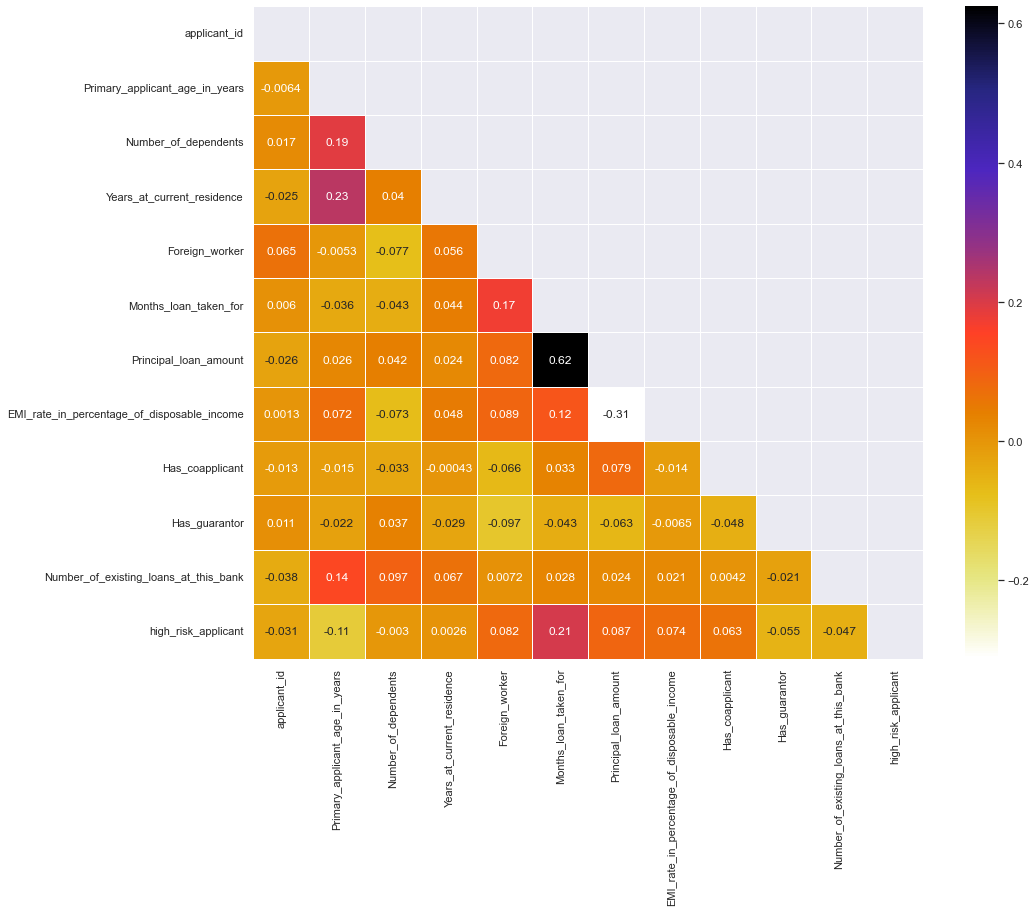

In [78]:
figure(figsize=(15, 12))
mask = np.zeros_like(data.corr('spearman'))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr('spearman'), annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, mask=mask)

<h3><b>Insights of the correlations</b></h3>
<li>Duration for which the loan was taken is higly correlated with applicant being a defaulter.</li>
<li>The more is the age of the applicant the more loans he might take</li>
<li>The more is the principal amount the more Longer it gets.</li>
<li>The more is the age of the applicant the longer he is supposed to live at the same residence.</li>
<li>Foreign Workers usually take Bigger and longer loans.</li>
<li>The More the dependants the more loans a person takes</li>
<li>The more the applicants age the more people depend on him</li>
<br>
<li> We must also obeserve that there are 12 cols in the above plot which means there are 15 cols with no-numeric datatype</li>

<br>
<br>
<br>

<b>All the above made conclusions are logically correct and hence, we can also conclude that the data is natural and not artificially made.</b>


## Handling Missing Values

<AxesSubplot:>

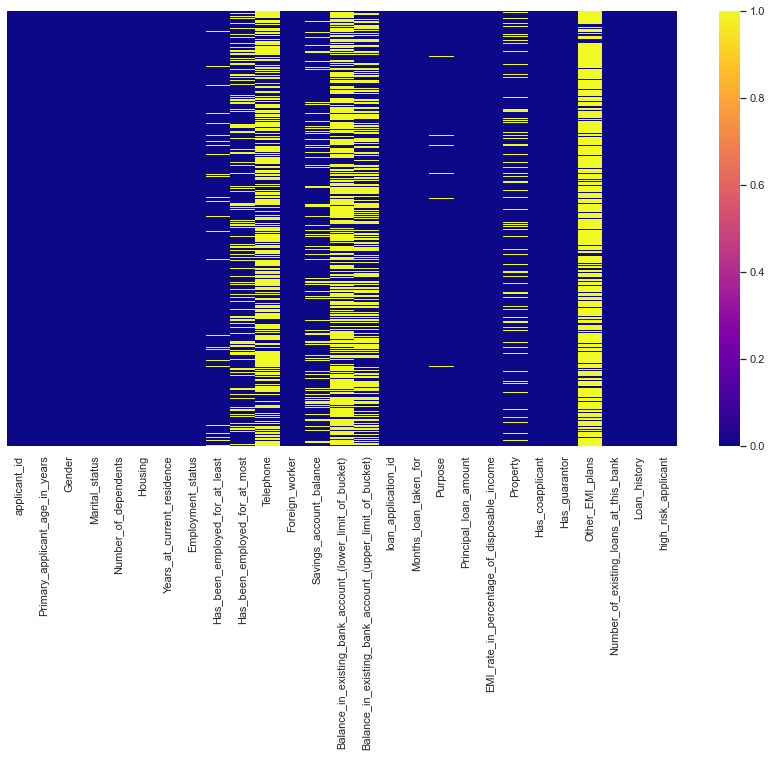

In [79]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='plasma')

From te above Data we can conclude that

<li>There are total 9 columns with null values</li>
<li>Out of the 9 columns 2 Columns namely 'Telephone' and      'Other_EMI_plans' needs to be eliminated entirely. Since, Telephone is a constant and Other_EMI_Plans have more than 80% null Values</li>
<li>The 2 columns 'Existing Bank Balance' also needs to be eliminated and they also do not enough variance among the data</li>


In [80]:
pd.Series(data.isnull().sum()).sort_values(ascending=False)

Other_EMI_plans                                             814
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Telephone                                                   596
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Property                                                    154
Has_been_employed_for_at_least                               62
Purpose                                                      12
Months_loan_taken_for                                         0
Loan_history                                                  0
Number_of_existing_loans_at_this_bank                         0
Has_guarantor                                                 0
Has_coapplicant                                               0
EMI_rate_in_percentage_of_disposable_income                   0
Principal_loan_amount                   

As you can see there are 9 features with missing values most of which are Non-Nomeric. 

Hence we would need to apply Imputation where we have atleast 60% of the data available and drop the columns with with more than 40% of the missign Data.

In [81]:
## Eliminating the columns
cols_to_remove = [
    'Other_EMI_plans',
    'Telephone',         
'Balance_in_existing_bank_account_(lower_limit_of_bucket)',
'Balance_in_existing_bank_account_(upper_limit_of_bucket)' ]
data_with_23_cols = data.drop(cols_to_remove, axis = 1)

<b>  We will impute the remaining features using KNN imputer</b>

Since, all the columns that require imputation are non-numeric.

<AxesSubplot:>

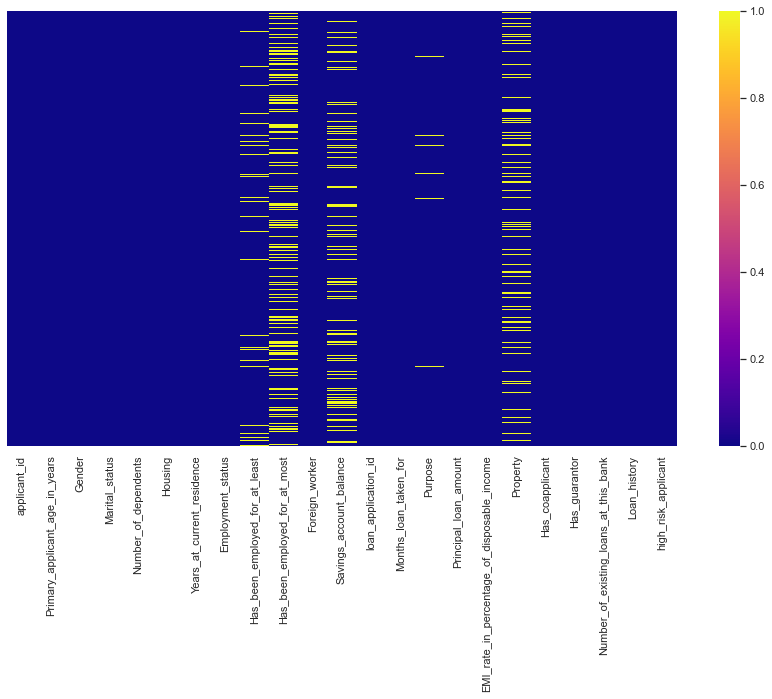

In [82]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='plasma')

In [83]:
cols_to_impute = ['Has_been_employed_for_at_most',                               
'Savings_account_balance',                                     
'Property',                                                    
'Has_been_employed_for_at_least',                              
'Purpose' ] 

In [84]:

def impute_by_KNN(df,column_name):
    fact_col, lable = pd.factorize(df[column_name])
    imputer = KNNImputer(n_neighbors=5, weights="distance", add_indicator = True)
    imputed = imputer.fit_transform([fact_col])
    imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
    df.drop(columns=column_name, inplace=True)
    df[column_name ] = imputed[0]
    return df
    

In [85]:
for col in cols_to_impute:
    impute_by_KNN(data_with_23_cols,col)

C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manually convert to an integer key instead.
  imputed =  pd.DataFrame([lable[i] for i in imputed[0] ])
C:\Users\pwayk\AppData\Local\Temp/ipykernel_31956/3119749226.py:5: FutureWarning: Indexing with a float is deprecated, and will raise an IndexError in pandas 2.0. You can manuall

<AxesSubplot:>

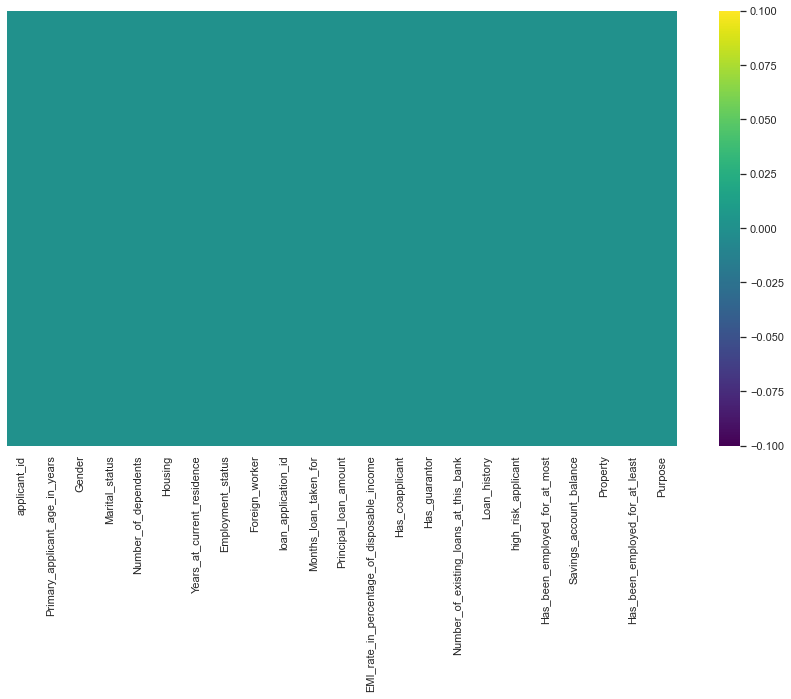

In [86]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data_with_23_cols.isnull(), yticklabels=False, cbar=True, cmap='viridis')

<b> Hence, Our Data has no more missing Values </b>

As we can see there are many features having string or object data types hence, we will be converting them to int or float in order to preprocess them properly

# Handling Categorical Variables

In [87]:
obj_cols = list(data_with_23_cols.select_dtypes(include='object'))
obj_cols

['Gender',
 'Marital_status',
 'Housing',
 'Employment_status',
 'loan_application_id',
 'Loan_history',
 'Has_been_employed_for_at_most',
 'Savings_account_balance',
 'Property',
 'Has_been_employed_for_at_least',
 'Purpose']

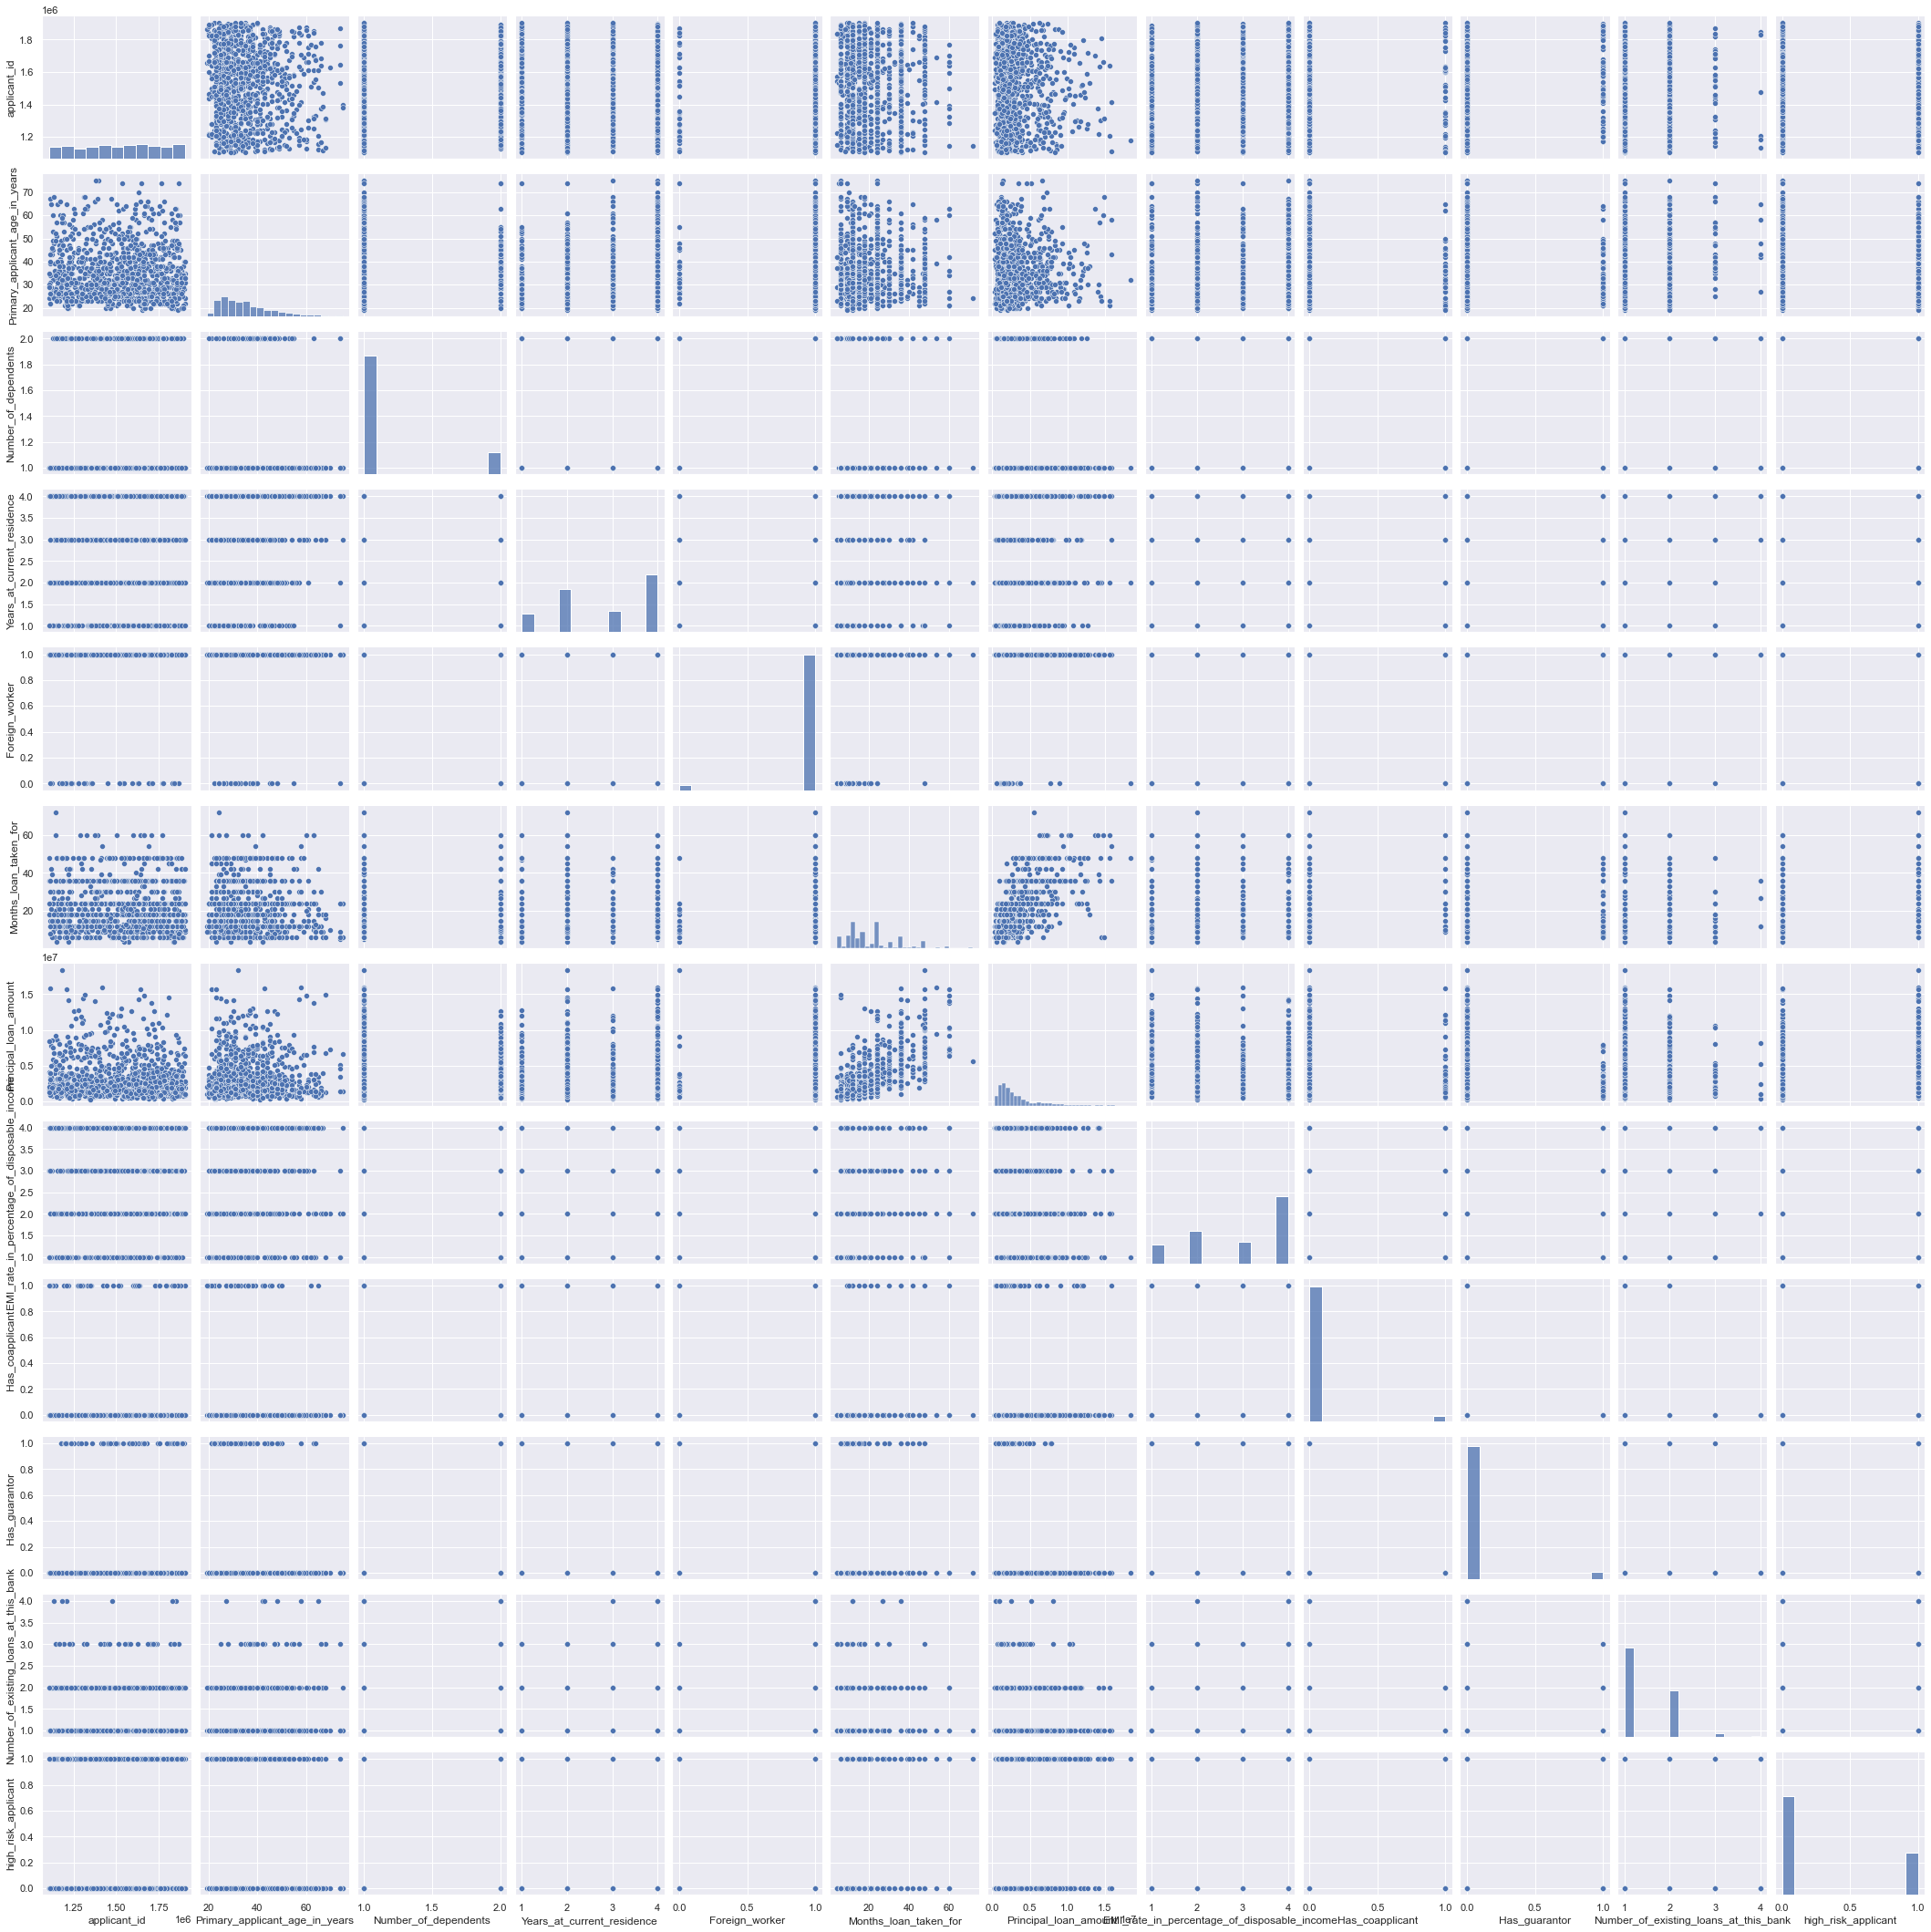

In [88]:
sns.pairplot(data_with_23_cols)

#### Applying One-Hot encoding on Nominal Features and Factorizing Ordinal Features

In [89]:
Nominals = ['Gender', 'Marital_status', 'Housing']
Ordinals = ['Employment_status', 'Savings_account_balance', 'Purpose', 'Loan_history', 'Property']

According to my research on the Problem Only the Above Features are Nominals or Ordinals  and the remaning ones are Numeric, just the type is object

<b>One Hot Encoding</b>

In [90]:
#One Hot Encoding
def encode(df, Nominals):
    for i in Nominals:
        dummies  = pd.get_dummies(df[i], drop_first = True, prefix=i)
        df = pd.concat([df,dummies], axis=1)
        df= df.drop(i, axis = 1)
    return df

one_hot_encoded_data= encode(data_with_23_cols, Nominals)

In [91]:
one_hot_encoded_data

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,loan_application_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,...,Savings_account_balance,Property,Has_been_employed_for_at_least,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent
0,1469590,67,1,4,skilled employee / official,1,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,1169000,4,...,Medium,real estate,7 years,electronic equipment,1,0,0,1,1,0
1,1203873,22,1,2,skilled employee / official,1,d68d989e-edad-11ea-b1d5-2bcf65006448,48,5951000,2,...,Low,real estate,1 year,electronic equipment,0,1,0,0,1,0
2,1432761,49,2,3,unskilled - resident,1,d68d995c-edad-11ea-814a-1b6716782575,12,2096000,2,...,Low,real estate,4 years,education,1,0,0,1,1,0
3,1207582,45,2,4,skilled employee / official,1,d68d99fc-edad-11ea-8841-17e8848060ae,42,7882000,2,...,Low,building society savings agreement/life insurance,4 years,FF&E,1,0,0,1,0,0
4,1674436,53,2,4,skilled employee / official,1,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,4870000,3,...,Low,car or other,1 year,new vehicle,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,1,4,unskilled - resident,1,d68fbba6-edad-11ea-80fe-30b2f9300e3d,12,1736000,3,...,Low,real estate,4 years,FF&E,0,1,0,0,1,0
996,1114064,40,1,4,management / self-employed / highly qualified ...,1,d68fbc28-edad-11ea-bc62-4240ac0824fa,30,3857000,4,...,Low,building society savings agreement/life insurance,1 year,used vehicle,1,0,0,0,1,0
997,1758046,38,1,4,skilled employee / official,1,d68fbcaa-edad-11ea-aafc-2de1139e42cd,12,804000,4,...,Low,car or other,7 years,electronic equipment,1,0,0,1,1,0
998,1824545,23,1,4,skilled employee / official,1,d68fbd2c-edad-11ea-b49e-2894666f2df6,45,1845000,4,...,Low,car or other,1 year,electronic equipment,1,0,0,1,0,0


<b>Factorizing</b>

In [92]:
# Storing lables for future use

lables = []
for i in Ordinals:
    one_hot_encoded_data[i], lable= pd.factorize(one_hot_encoded_data[i])
    lables.append(lable)




In [93]:
lables1 = {'lables': lables}
sampleJson = jsonpickle.encode(lables1)
with open('lables.json', 'w') as f:
    json.dump(sampleJson, f)

In [94]:
one_hot_encoded_data

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,loan_application_id,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,...,Savings_account_balance,Property,Has_been_employed_for_at_least,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent
0,1469590,67,1,4,0,1,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,1169000,4,...,0,0,7 years,0,1,0,0,1,1,0
1,1203873,22,1,2,0,1,d68d989e-edad-11ea-b1d5-2bcf65006448,48,5951000,2,...,1,0,1 year,0,0,1,0,0,1,0
2,1432761,49,2,3,1,1,d68d995c-edad-11ea-814a-1b6716782575,12,2096000,2,...,1,0,4 years,1,1,0,0,1,1,0
3,1207582,45,2,4,0,1,d68d99fc-edad-11ea-8841-17e8848060ae,42,7882000,2,...,1,1,4 years,2,1,0,0,1,0,0
4,1674436,53,2,4,0,1,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,4870000,3,...,1,2,1 year,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,1,4,1,1,d68fbba6-edad-11ea-80fe-30b2f9300e3d,12,1736000,3,...,1,0,4 years,2,0,1,0,0,1,0
996,1114064,40,1,4,2,1,d68fbc28-edad-11ea-bc62-4240ac0824fa,30,3857000,4,...,1,1,1 year,4,1,0,0,0,1,0
997,1758046,38,1,4,0,1,d68fbcaa-edad-11ea-aafc-2de1139e42cd,12,804000,4,...,1,2,7 years,0,1,0,0,1,1,0
998,1824545,23,1,4,0,1,d68fbd2c-edad-11ea-b49e-2894666f2df6,45,1845000,4,...,1,2,1 year,0,1,0,0,1,0,0


### Reamaining Categorical Columns

Now there are only 3 Categorical Columns Remaining

<li> Application Id </li>
<li> Least Employement</li>
<li>Max Employement</li>

Out of these Application Id would be removed since it is a primary key.
The Remaining 2 columns could be merged into one column as Average Employement by taking the average of the 2 

In [95]:
one_hot_encoded_data = one_hot_encoded_data.drop('loan_application_id', axis=1)

In [96]:
one_hot_encoded_data 

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,...,Savings_account_balance,Property,Has_been_employed_for_at_least,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent
0,1469590,67,1,4,0,1,6,1169000,4,0,...,0,0,7 years,0,1,0,0,1,1,0
1,1203873,22,1,2,0,1,48,5951000,2,0,...,1,0,1 year,0,0,1,0,0,1,0
2,1432761,49,2,3,1,1,12,2096000,2,0,...,1,0,4 years,1,1,0,0,1,1,0
3,1207582,45,2,4,0,1,42,7882000,2,0,...,1,1,4 years,2,1,0,0,1,0,0
4,1674436,53,2,4,0,1,24,4870000,3,0,...,1,2,1 year,3,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,1,4,1,1,12,1736000,3,0,...,1,0,4 years,2,0,1,0,0,1,0
996,1114064,40,1,4,2,1,30,3857000,4,0,...,1,1,1 year,4,1,0,0,0,1,0
997,1758046,38,1,4,0,1,12,804000,4,0,...,1,2,7 years,0,1,0,0,1,1,0
998,1824545,23,1,4,0,1,45,1845000,4,0,...,1,2,1 year,0,1,0,0,1,0,0


In [97]:
average_employed_years = []
for i, j in zip(one_hot_encoded_data['Has_been_employed_for_at_most'], one_hot_encoded_data['Has_been_employed_for_at_least']):
    i = int(i.replace('years', '').replace('year', '').strip())
    j = int(j.replace('years', '').replace('year', '').strip())
    average_employed_years.append((i+j)/2)


In [98]:
one_hot_encoded_data['average_employed_years'] = average_employed_years
one_hot_encoded_data = one_hot_encoded_data.drop('Has_been_employed_for_at_most', axis=1)
one_hot_encoded_data = one_hot_encoded_data.drop('Has_been_employed_for_at_least', axis=1)


In [99]:
one_hot_encoded_data

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,...,Savings_account_balance,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years
0,1469590,67,1,4,0,1,6,1169000,4,0,...,0,0,0,1,0,0,1,1,0,4.0
1,1203873,22,1,2,0,1,48,5951000,2,0,...,1,0,0,0,1,0,0,1,0,2.5
2,1432761,49,2,3,1,1,12,2096000,2,0,...,1,0,1,1,0,0,1,1,0,5.5
3,1207582,45,2,4,0,1,42,7882000,2,0,...,1,1,2,1,0,0,1,0,0,5.5
4,1674436,53,2,4,0,1,24,4870000,3,0,...,1,2,3,1,0,0,1,0,0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1880194,31,1,4,1,1,12,1736000,3,0,...,1,0,2,0,1,0,0,1,0,5.5
996,1114064,40,1,4,2,1,30,3857000,4,0,...,1,1,4,1,0,0,0,1,0,2.5
997,1758046,38,1,4,0,1,12,804000,4,0,...,1,2,0,1,0,0,1,1,0,4.0
998,1824545,23,1,4,0,1,45,1845000,4,0,...,1,2,0,1,0,0,1,0,0,2.5


<b> Dropping Applicant Id since it is a primary key and has no logical significance</b>

In [100]:
one_hot_encoded_data = one_hot_encoded_data.drop('applicant_id', axis=1)

In [101]:
one_hot_encoded_data

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,...,Savings_account_balance,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years
0,67,1,4,0,1,6,1169000,4,0,0,...,0,0,0,1,0,0,1,1,0,4.0
1,22,1,2,0,1,48,5951000,2,0,0,...,1,0,0,0,1,0,0,1,0,2.5
2,49,2,3,1,1,12,2096000,2,0,0,...,1,0,1,1,0,0,1,1,0,5.5
3,45,2,4,0,1,42,7882000,2,0,1,...,1,1,2,1,0,0,1,0,0,5.5
4,53,2,4,0,1,24,4870000,3,0,0,...,1,2,3,1,0,0,1,0,0,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,4,1,1,12,1736000,3,0,0,...,1,0,2,0,1,0,0,1,0,5.5
996,40,1,4,2,1,30,3857000,4,0,0,...,1,1,4,1,0,0,0,1,0,2.5
997,38,1,4,0,1,12,804000,4,0,0,...,1,2,0,1,0,0,1,1,0,4.0
998,23,1,4,0,1,45,1845000,4,0,0,...,1,2,0,1,0,0,1,0,0,2.5


## Saving the Progress till now

In [102]:
one_hot_encoded_data.to_csv('Data/Preprocessed/encoded.csv')

In [103]:
data = one_hot_encoded_data
data.shape

(1000, 23)

In [104]:
numeric_cols = [i for i in data.columns if i not in Nominals + Ordinals + ['Foreign_worker', 'Has_guarantor', 'high_risk_applicant', 'Gender_male',
 'Marital_status_divorced/separated/married',
 'Marital_status_married/widowed',
 'Marital_status_single',
 'Housing_own',
 'Housing_rent', 
 'Has_coapplicant']]

numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

# Looking Out for Outliers

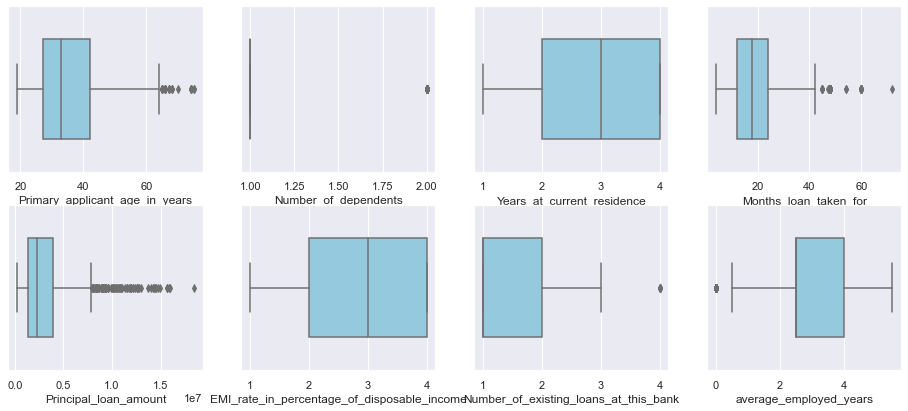

In [105]:
figure(figsize=(16, 14))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    sns.boxplot(data = data, x = numeric_cols[i],  width=.6,color='skyblue')

#### Observations

<li> From the above plot we can infer that there are very few features having significant  outliers</li>
<li>The Features Principal , Age, Months loan taken far have some significant amount of Outliers</li>
<li>Since, we would be Using Randome Forest Classifiers and XG Boost Models the outliers might not affect significantly</li>


#### now we will be checking actually how many outliers are present in the 3 cols and how extreme they are

In [106]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [107]:
ou1 = detect_outliers(data['Months_loan_taken_for'])
ou2 = detect_outliers(data['Primary_applicant_age_in_years'])
ou3 = detect_outliers(data['Principal_loan_amount'])
print(ou1)
print(ou2)
print(ou3)

[60, 60, 60, 60, 60, 60, 60, 60, 60, 72, 60, 60, 60, 60]
[70, 74, 75, 74, 75, 74, 74]
[12579000, 14421000, 12612000, 15945000, 11938000, 14555000, 12169000, 11998000, 13756000, 14782000, 14318000, 12976000, 11760000, 12389000, 12204000, 15653000, 14027000, 14179000, 12680000, 15857000, 11816000, 15672000, 18424000, 14896000, 12749000]


Hence, we found that there are few values in 2 features which require some imputation but since the features are correlated and changing/imputing values would have a significant effect we would not impute anything and leave the values as it is.

## Feature Transformations

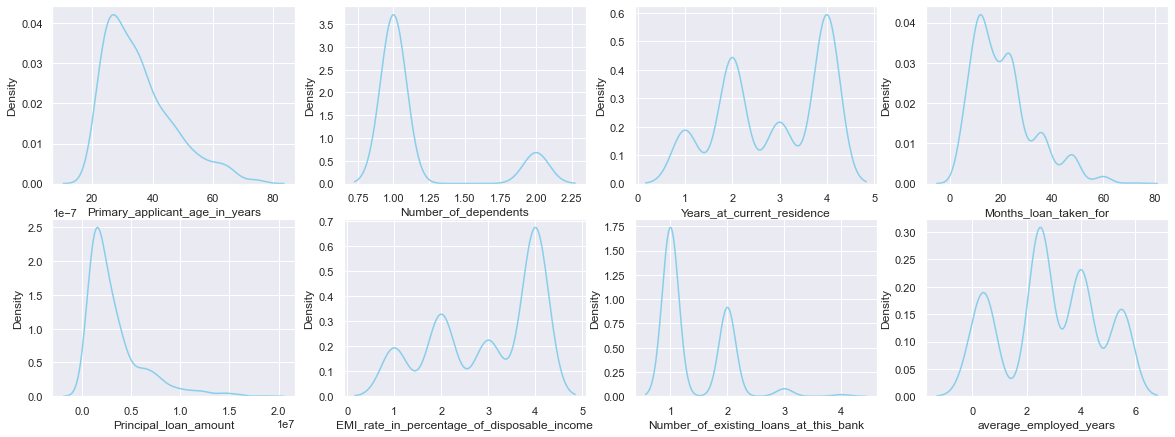

In [108]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(data = data, x = numeric_cols[i], color='skyblue')

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

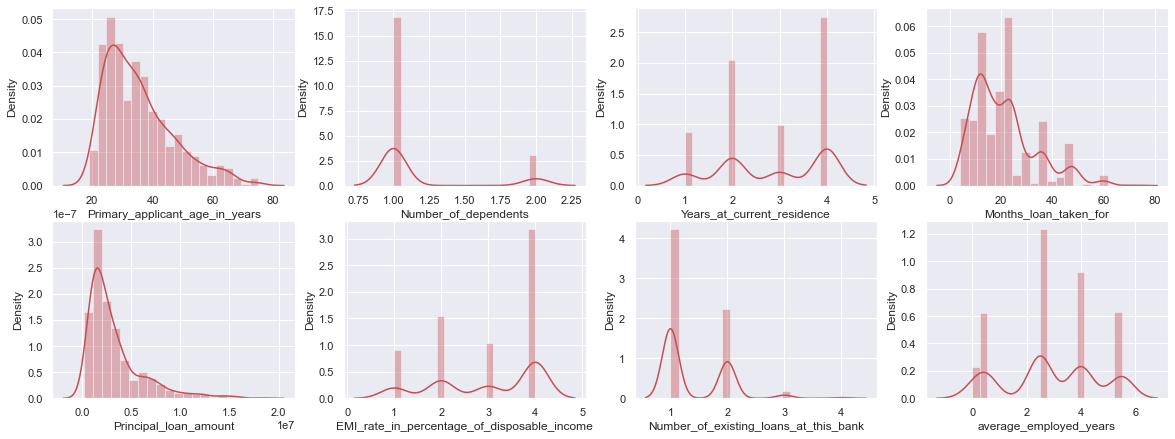

In [109]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1,)
    sns.color_palette("hls", 8)
    sns.distplot(data[numeric_cols[i]], color = 'r', bins= 20)

#### Observations from above Data

<li>The columns age, months and principal do seam to have normal distribution and the other columns are suffieciently descrete.</li>
<li>Although age, months and princpal are all left skewed and hence, we will be transforming them to form a proper Normal Distribution</li>


In [110]:

def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

In [111]:
numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

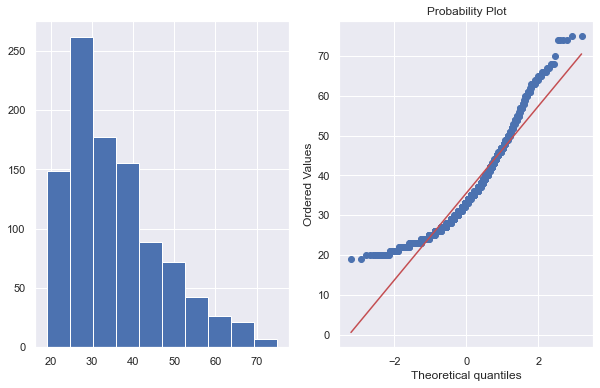

In [112]:
plot_data(data,'Primary_applicant_age_in_years')

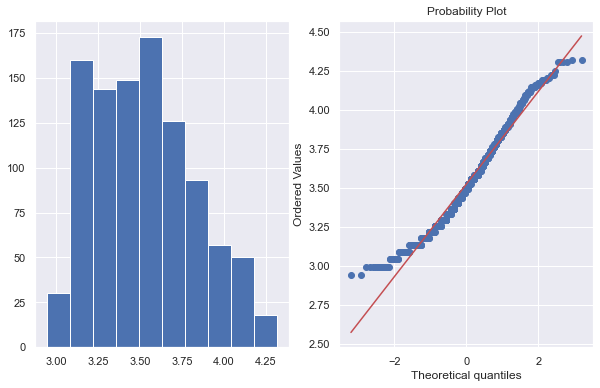

In [113]:
data['Primary_applicant_age_in_years_log']=np.log(data['Primary_applicant_age_in_years'])
plot_data(data,'Primary_applicant_age_in_years_log')

##### As you can see taking the log of values that is converting them to lagrithmic distribution makes the data even more normally distrubuted. Hence, we will be applying the same method to other 2 features as well

In [114]:
data['Primary_applicant_age_in_years']=np.log1p(data['Primary_applicant_age_in_years'])
data['Principal_loan_amount']=np.log1p(data['Principal_loan_amount'])
data['average_employed_years']=np.log1p(data['average_employed_years'])

normally_distributed_data  = data.drop('Primary_applicant_age_in_years_log', axis = 1)

c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\pwayk\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

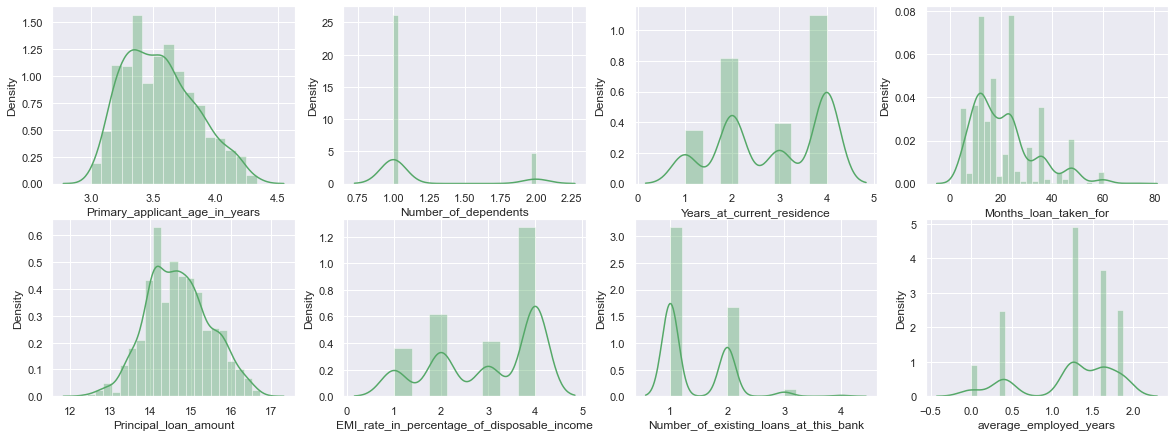

In [115]:
figure(figsize=(20, 15))
count = 8
for i in range(count):
    plt.subplot(4, 4, i+1,)
    sns.color_palette("hls", 8)
    sns.distplot(data[numeric_cols[i]], color = 'g')

#### The difference in 3 transformed features is loud and clear 🥳😊

In [116]:
normally_distributed_data

,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Employment_status,Foreign_worker,Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,...,Savings_account_balance,Property,Purpose,Gender_male,Marital_status_divorced/separated/married,Marital_status_married/widowed,Marital_status_single,Housing_own,Housing_rent,average_employed_years
0,4.219508,1,4,0,1,6,13.971660,4,0,0,...,0,0,0,1,0,0,1,1,0,1.609438
1,3.135494,1,2,0,1,48,15.599070,2,0,0,...,1,0,0,0,1,0,0,1,0,1.252763
2,3.912023,2,3,1,1,12,14.555542,2,0,0,...,1,0,1,1,0,0,1,1,0,1.871802
3,3.828641,2,4,0,1,42,15.880092,2,0,1,...,1,1,2,1,0,0,1,0,0,1.871802
4,3.988984,2,4,0,1,24,15.398605,3,0,0,...,1,2,3,1,0,0,1,0,0,1.252763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.465736,1,4,1,1,12,14.367095,3,0,0,...,1,0,2,0,1,0,0,1,0,1.871802
996,3.713572,1,4,2,1,30,15.165400,4,0,0,...,1,1,4,1,0,0,0,1,0,1.252763
997,3.663562,1,4,0,1,12,13.597356,4,0,0,...,1,2,0,1,0,0,1,1,0,1.609438
998,3.178054,1,4,0,1,45,14.427990,4,0,0,...,1,2,0,1,0,0,1,0,0,1.252763


In [117]:
normally_distributed_data.shape

(1000, 23)

In [118]:
normally_distributed_data.columns

Index(['Primary_applicant_age_in_years', 'Number_of_dependents',
       'Years_at_current_residence', 'Employment_status', 'Foreign_worker',
       'Months_loan_taken_for', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Has_coapplicant',
       'Has_guarantor', 'Number_of_existing_loans_at_this_bank',
       'Loan_history', 'high_risk_applicant', 'Savings_account_balance',
       'Property', 'Purpose', 'Gender_male',
       'Marital_status_divorced/separated/married',
       'Marital_status_married/widowed', 'Marital_status_single',
       'Housing_own', 'Housing_rent', 'average_employed_years'],
      dtype='object')

##### Converting the datatypes to thier original dtype so that models can deal with it fluently.

In [119]:
numeric_cols

['Primary_applicant_age_in_years',
 'Number_of_dependents',
 'Years_at_current_residence',
 'Months_loan_taken_for',
 'Principal_loan_amount',
 'EMI_rate_in_percentage_of_disposable_income',
 'Number_of_existing_loans_at_this_bank',
 'average_employed_years']

In [120]:
normally_distributed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   float64
 1   Number_of_dependents                         1000 non-null   int64  
 2   Years_at_current_residence                   1000 non-null   int64  
 3   Employment_status                            1000 non-null   int64  
 4   Foreign_worker                               1000 non-null   int64  
 5   Months_loan_taken_for                        1000 non-null   int64  
 6   Principal_loan_amount                        1000 non-null   float64
 7   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 8   Has_coapplicant                              1000 non-null   int64  
 9   Has_guarantor                                1000 non-null   int64  
 10  N

In [121]:
for i in normally_distributed_data.columns:
    if i not in numeric_cols:
        normally_distributed_data[i] = normally_distributed_data[i].astype('object')

In [122]:
normally_distributed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Primary_applicant_age_in_years               1000 non-null   float64
 1   Number_of_dependents                         1000 non-null   int64  
 2   Years_at_current_residence                   1000 non-null   int64  
 3   Employment_status                            1000 non-null   object 
 4   Foreign_worker                               1000 non-null   object 
 5   Months_loan_taken_for                        1000 non-null   int64  
 6   Principal_loan_amount                        1000 non-null   float64
 7   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64  
 8   Has_coapplicant                              1000 non-null   object 
 9   Has_guarantor                                1000 non-null   object 
 10  N

##### Finally the data is clean and clear and now we can proceed for advance Data Analytics and some quality visualizations

In [123]:
normally_distributed_data.to_csv('Data/Preprocessed/clean_data.csv', index = False)